# KNN Classifier
예제 : 길이와 무게를 주었을 때 bream일까, smelt일까?

In [759]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3,
                11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7,
                10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

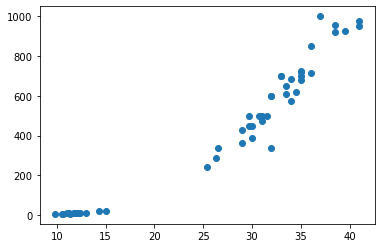

In [760]:
import pandas as pd
length = pd.DataFrame(bream_length + smelt_length)
weight = pd.DataFrame(bream_weight + smelt_weight)

import matplotlib.pyplot as plt

plt.scatter(length, weight)
plt.show()

In [761]:
import numpy as np

fish_data = pd.concat([length, weight], axis=1)
fish_data = np.array(fish_data)

# StandardScaler로 Zscore(MSE) 통일
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(fish_data)
fish_data = ss.transform(fish_data)

# Target 생성
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target = np.array(fish_target)


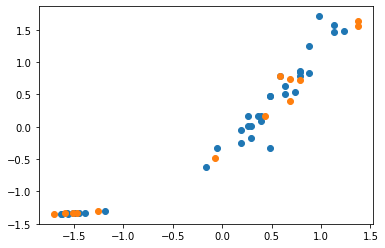

In [762]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target)

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.show()

1.0
1.0
[1.]


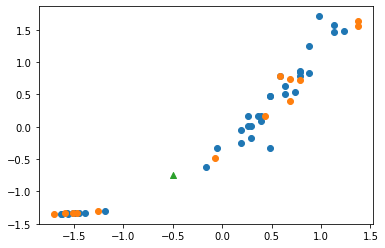

In [763]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
print(kn.score(train_input, train_target))
print(kn.score(test_input, test_target))

new = np.array([[22, 200]])
new = ss.transform(new)
print(kn.predict(new))

plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(test_input[:, 0], test_input[:, 1])
plt.scatter(new[:,0], new[:,1], marker='^')
plt.show()


# KNN Regressor
예제 : perch의 길이를 주었을 때 무게를 예측하라

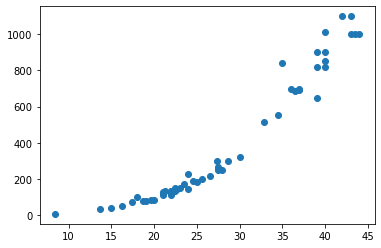

In [764]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
                         21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
                         23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
                         27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
                         39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
                         44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
                         115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
                         150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
                         218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
                         556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
                         850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
                         1000.0])

plt.scatter(perch_length, perch_weight)
plt.show()

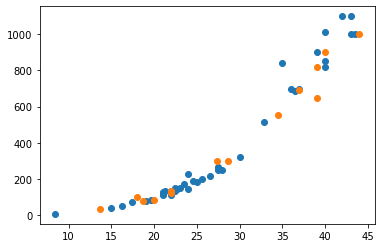

In [765]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.show()


0.9790458422521724
0.9522133598265083


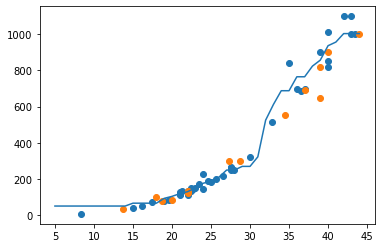

In [766]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))
print(knr.score(test_input, test_target))

list = []
for i in range(5, 45):
    list.append(knr.predict([[i]]))

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(range(5,45), list)
plt.show()

# 1차 LinearRegression

0.912734681611648
0.9339939025616028


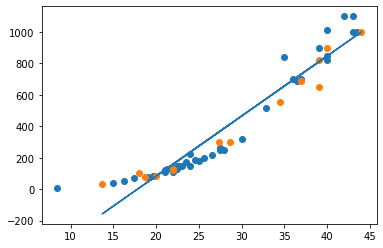

In [767]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))
pred = lr.predict(test_input)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(test_input, pred)
plt.show()

# 2차 LinearRegression

0.9745256918184496
0.9593791824927485
[  1.06777035 -23.83793022]


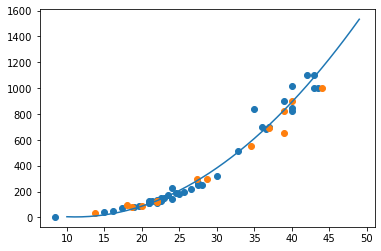

In [768]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# pred = lr.predict(train_poly)

point = np.arange(10, 50)
print(lr.coef_)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0]*point**2 + lr.coef_[1]*point + lr.intercept_)
plt.show()

# 3차 LinearRegression

0.9754818309464588
0.9594397953501071
[-1.34066125e-02  2.12884247e+00 -4.93419031e+01]


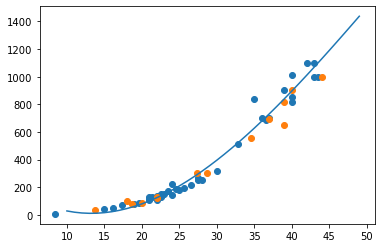

In [769]:
train_poly = np.column_stack((train_input ** 3,train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 3,test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))
# pred = lr.predict(train_poly)

point = np.arange(10, 50)
print(lr.coef_)

plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)
plt.plot(point, lr.coef_[0]*point**3 + lr.coef_[1]*point**2 + lr.coef_[2]*point + lr.intercept_)
plt.show()

# 다중(3중) 1차 LinearRegression

In [770]:
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()
# print(perch_full)

train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state=42)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))


0.9559326821885706
0.8796419177546367


# 다중(3중) 2차 LinearRegression

In [771]:
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

point = np.arange(10, 50)

0.9894085405916164
0.9831744307486032


# KNN 다중 Classifier
예제 : 길이, 무게, 대각선, 높이, 넓이를 주었을 때 어떤 물고기인지 맞춰라

In [772]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [773]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [774]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

kn = KNeighborsClassifier()
kn.fit(train_scaled, train_target)
print(kn.classes_)

# 5개를 예측
print(kn.predict(test_scaled[:5]))

# 예측한 5개의 확률
# probability: 확률
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
[[0.  0.  0.6 0.  0.4 0.  0. ]
 [0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.2 0.8 0.  0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]
 [0.  0.  0.8 0.  0.2 0.  0. ]]


# LogisticRegression 이진분류
회귀라고 하지만 이진 분류만 가능하다  
예제 : 길이, 무게, 대각선, 높이, 넓이를 주었을 때 Bream과 Smelt만 일단 분류하라

In [775]:
# 불리언 인덱싱! 중요한 파이썬 문법이다!
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
# Bream과 Smelt만 뽑는다
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [776]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

# 예측
print(lr.predict(train_bream_smelt[:5]))

# 예측한 데이터의 확률
print(lr.predict_proba(train_bream_smelt[:5]))

# 로지스틱 회귀의 계수 확인
print(lr.coef_, lr.intercept_) 
# z = a*무게 + b*길이 + c*대각선 + d*높이 + e*두께 + f
# a,b,c,d,e,f 값이 나온다

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


# LogisticRegression 다중분류
예제 : 길이, 무게, 대각선, 높이, 넓이를 주었을 때 어떤 물고기인지 맞춰라

In [777]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=20, max_iter=1000)
# C: 올라가면 규제가 약해지고, 내려가면 규제가 강해진다 (선형회귀와 반대) || iter: 반복횟수
# max_iter 값은 충분한 학습이 안될거라고 경고를 띄워준다.
# 하지만 C값은 우리가 정해주어야하는 것이므로 경고 띄우진 않음 (하이퍼파라미터)
lr.fit(train_scaled, train_target)

# 그냥 probability를 구할 때
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

# 좀 힘들게 구할 때 (softmax 함수 사용)
decisions = lr.decision_function(test_scaled[:5])
# z = a*무게 + b*길이 + c*대각선 + d*높이 + e*두께 + f
# z값이 나온다

from scipy.special import softmax
proba = softmax(decisions, axis=1)
print()
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# LogisticRegression 다중분류 2
예제 : 알코올, 설탕, pH 를 주었을 때 화이트와인인지, 레드와인인지 구분하라

In [778]:
import pandas as pd
# wine = pd.read_csv("winequality-red.csv")
wine = pd.read_csv('https://bit.ly/wine_csv_data')
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [779]:
# data와 target
data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target = wine['class'].to_numpy()

# 오버피팅을 방지하기 위해 train test 데이터 분리
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42)

# 8대 2 비율로 데이터를 나눔
print(train_input.shape, test_input.shape)

# 인풋을 전처리함
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

# 꼭 test도 변환시켜줘야 한다.
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

(5197, 3) (1300, 3)


In [780]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

pred = [[9.4, 1.9, 3.51]]
# KNN, 로지스틱 모두 꼭 Scaling의 과정을 거쳐야만 한다.
pred = ss.transform(pred)
print(lr.predict(pred))

0.7808350971714451
0.7776923076923077
[0.]


# DecisionTreeClassifier 다중분류

In [781]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
# Scailing을 안해도 된다!!!!!
dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.996921300750433
0.8592307692307692


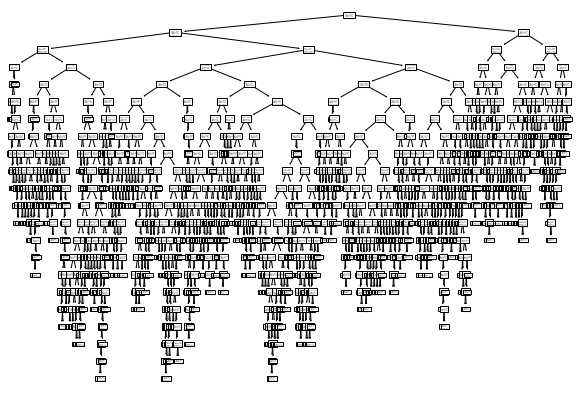

In [782]:
# 그래프 출력
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# 전체 출력
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()

Overfitting을 방지하기 위한 가지치기 (Pruning)

In [ ]:
# max_depth = 3
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

plt.figure(figsize=(20, 15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()